In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\p1\AppData\Local\Temp\ipykernel_32568\357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\p1\AppData\Local\Temp\ipykernel_32568\357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

# Zad
nauczmy model z EarlyStopping

Musimy podać:
* miarę, która ma zostać użyta do zatrzymania modelu
* jak długo ma model ma czekać na otrzymanie lepszego parametru zanim się zatrzyma


In [7]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.4522 - accuracy: 0.7823 - val_loss: 0.3896 - val_accuracy: 0.8040
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8093 - val_loss: 0.3746 - val_accuracy: 0.8096
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 0.8118 - val_loss: 0.3717 - val_accuracy: 0.8117
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3719 - accuracy: 0.8139 - val_loss: 0.3642 - val_accuracy: 0.8200
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3729 - accuracy: 0.8108 - val_loss: 0.3681 - val_accuracy: 0.8135
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3695 - accuracy: 0.8171 - val_loss: 0.3635 - val_accuracy: 0.8214
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3741 - accuracy: 0.8115 - val_loss: 0.3669 - val_accuracy: 0.8150

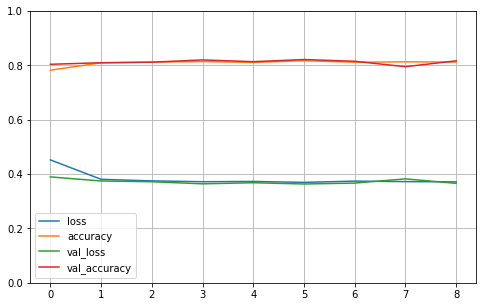

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 0s 794us/step - loss: 0.3659 - accuracy: 0.8167


[0.3659370243549347, 0.8166666626930237]

# Zad.
Na poniższych danych naucz

* model bez EarlyStopping z 1000 epok
* model z wykorzystaniem EarlyStopping 
    dobierz paametr
    ```python
    patience=
    ```

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




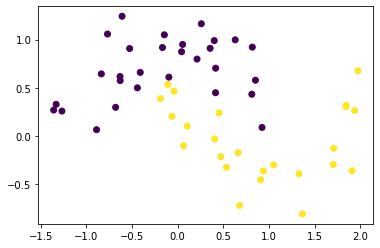

In [13]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
n_train = 30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [15]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[early_stopping])

Epoch 1/100


ValueError: in user code:

    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 41), found shape=(None, 2)


In [20]:
import tensorflow as ts
tf.reshape(X_train, [10, 10])

InvalidArgumentError: Input to reshape is a tensor with 106 values, but the requested shape has 100 [Op:Reshape]

In [17]:

history = model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(X_test, y_test))

Epoch 1/10


ValueError: in user code:

    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\p1\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 41), found shape=(None, 2)


In [ ]:
from mlxtend.plotting import plot_decision_regions


In [ ]:
from mlxtend.plotting import plot_decision_regions
